# Initialization

## Import libraries

In [1]:
from visualeyes.core._utility import (dataframe_validation, aoi_definitions_validation, screen_dimensions_validation)


In [2]:
import os
import eyelinkio
import pandas as pd
import sys
import matplotlib.pyplot as plt

## Import `visualeyes`

In [3]:
# get the current working directory (location of the notebook)
notebook_dir = os.getcwd()

# path to the visualeyes package
visualeyes_path = os.path.abspath(os.path.join(notebook_dir, "..")) # Go up one directory

# add the path to sys.path
if visualeyes_path not in sys.path:
    sys.path.append(visualeyes_path)

# import visualeyes
import visualeyes

## Fetch Example Data

In [4]:
# define the path to the edf file
current_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(current_path, "..", "data"))
edf_path = os.path.join(data_dir, 'TG_2015.EDF')

# Analysis

## Convert edf file to pandas dataframes

In [5]:
# read the edf file
edf = eyelinkio.read_edf(edf_path)

# convert the edf file to a dicitionary of pandas dataframes
edf_dfs = edf.to_pandas()

loadEvents = 1
setTrial End:  END


## Example 1: visualize data quality of the entire experiment

In [6]:
# add time column to the dataframes
edf_dfs['samples']['time'] = edf['times']
all_data = edf_dfs['samples']

In [7]:
# define the AOI
aoi_definitions =[{'shape': 'circle', 'coordinates': (650, 400, 100)},
                  {'shape': 'circle', 'coordinates': (100, 400, 100)},
                  {'shape': 'circle', 'coordinates': (1100, 400, 100)}]
width, height = edf['info']['screen_coords']

aoi_mask = visualeyes.define_aoi((height, width), aoi_definitions)


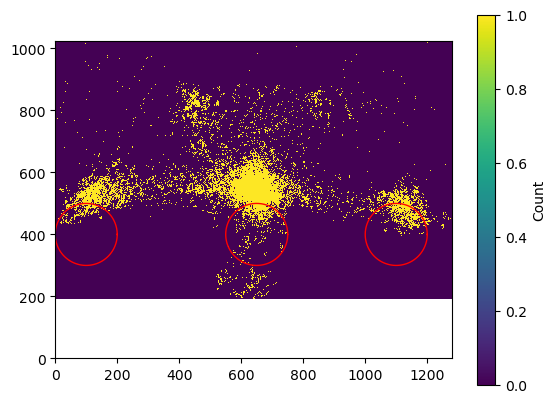

In [8]:
_, _, h_data = visualeyes.plot_heatmap(all_data, screen_dimensions = (height, width), 
                                       bins=(width, height),
                        aoi_definitions=aoi_definitions)
plt.savefig('heatmap.png') 

In [9]:
# calculate the percentage of data points in all AOIs
percent_data = visualeyes.percent_data_in_aoi(all_data, aoi_mask, screen_dimensions=(height, width))
percent_data

np.float64(12.897291248781464)

## Example 2: visualize looking behavior during the first 300ms of each trial

In [10]:
# # get trial data
# trial_data = edf_dfs['discrete']['trials']

# # epoch the first 300ms of every trial
# trial_start = trial_data['stime'].values
# duration = 300/1000 # 300ms = 0.3s

# # get the data, here we are interested in all samples collected
# all_data = edf_dfs['samples']

# # epoch the data
# epochs, epoched_data = visualeyes.epoch_data(all_data, trial_start, duration)
# epoched_data

In [11]:
data = all_data
screen_dimensions=(height, width)

In [12]:
screen_dimensions

(np.int64(1024), np.int64(1280))

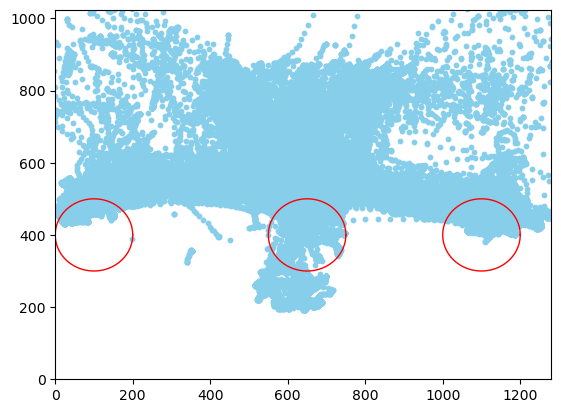

In [13]:
# add time column to the dataframes
edf_dfs['samples']['time'] = edf['times']
all_data = edf_dfs['samples']
all_data = all_data.dropna()
_, _, s_data = visualeyes.plot_as_scatter(all_data,
                           screen_dimensions=(height, width),
                           aoi_definitions=aoi_definitions,
                           marker_size=10)
plt.savefig('scatter.png')

In [14]:
all_data

,xpos,ypos,ps,time
0,599.200012,452.500000,510.0,0.000
1,599.500000,454.200012,511.0,0.002
2,600.000000,455.899994,511.0,0.004
3,600.400024,457.299988,512.0,0.006
4,600.700012,459.100006,513.0,0.008
...,...,...,...,...
668984,408.799988,409.500000,111.0,1337.968
668985,414.799988,403.799988,111.0,1337.970
668986,422.600006,396.899994,111.0,1337.972
668987,421.899994,395.000000,111.0,1337.974
